# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [893]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

inline_rc = dict(rcParams)

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [894]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [895]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [896]:
boston.data.shape

(506, 13)

In [897]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [898]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [899]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [900]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [901]:
print(boston.target.shape)

(506,)


In [902]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [903]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

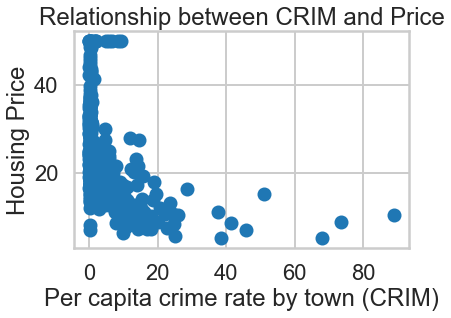

In [904]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [905]:
# your turn: describe relationship
# Exercise: What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?

print("I see a negative non-linear relationship, possibly exponential.")
print(
    "I don't see any clear outliers, but a handful of observations have higher CRIM values than the others."
)
print(
    "There are fewer samples with high CRIM values than with low CRIM values, most of which range from 0 to 30."
)
print(
    "A cluster of low-crime, high-price data points roughly form a horizontal line segment in the second quadrant."
)
print(
    "Perhaps prices past a certain threshold are coded to some sort of ceiling value."
)


I see a negative non-linear relationship, possibly exponential.
I don't see any clear outliers, but a handful of observations have higher CRIM values than the others.
There are fewer samples with high CRIM values than with low CRIM values, most of which range from 0 to 30.
A cluster of low-crime, high-price data points roughly form a horizontal line segment in the second quadrant.
Perhaps prices past a certain threshold are coded to some sort of ceiling value.


C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality r

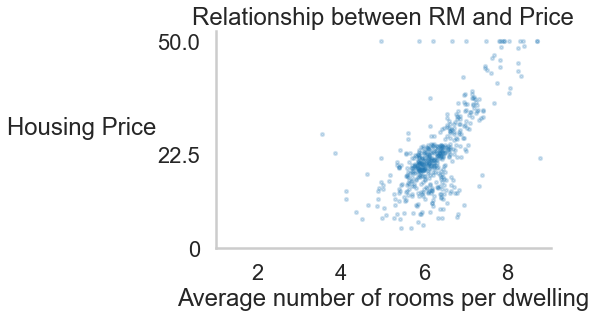

More rooms is associated with a higher price: apparent positive correlation.


In [906]:
# your turn: scatter plot between *RM* and *PRICE*
# Exercise: Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.

rcParams.update(inline_rc)
plt.scatter(bos.RM, bos.PRICE, s=10, alpha=0.2)
plt.title("Relationship between RM and Price")
ax = plt.gca()

plt.grid(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.axis(ymax=bos.PRICE.max() + 2.5, xmin=1)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price", rotation=0)
t = [0, round(bos.PRICE.mean(), 1), bos.PRICE.max()]
plt.yticks(t, t)
ax.yaxis.set_label_coords(-0.4, 0.5)

plt.show()
print("More rooms is associated with a higher price: apparent positive correlation.")

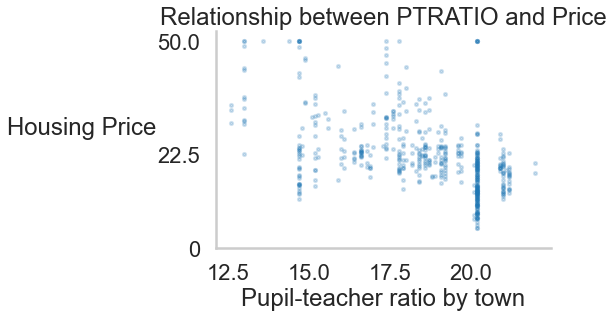

Higher pupil-teacher ratios are associated with lower prices: apparent negative correlation.


In [907]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
# Exercise: Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.

plt.scatter(bos.PTRATIO, bos.PRICE, s=10, alpha=0.2)
plt.title("Relationship between PTRATIO and Price")
ax = plt.gca()

plt.grid(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.axis(ymax=bos.PRICE.max() + 2.5)
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price", rotation=0)
t = [0, round(bos.PRICE.mean(), 1), bos.PRICE.max()]
plt.yticks(t, t)
ax.yaxis.set_label_coords(-0.4, 0.5)

plt.show()
print(
    "Higher pupil-teacher ratios are associated with lower prices: apparent negative correlation."
)


Although it is a binary discrete variable, CHAS is interesting since riverfront properties may be priced differently.


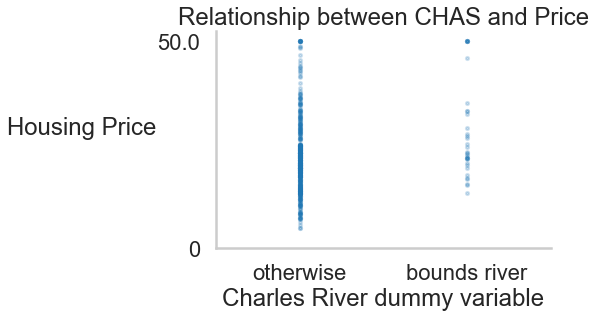

Riverside properties may have slightly lower prices on average.

Properties with better access to infrastructure may be priced differently, so RAD is interesting.


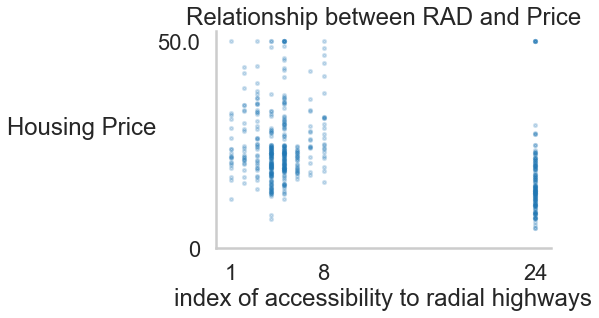

Higher index scores are associated with lower prices.
Interestingly, all observations either have RAD values of 24 or are less than or equal to 8 (on an ordinal scale).

NOX is interesting because it is a measure of a pollutant, so we'd expect high NOX to associated with low PRICE.


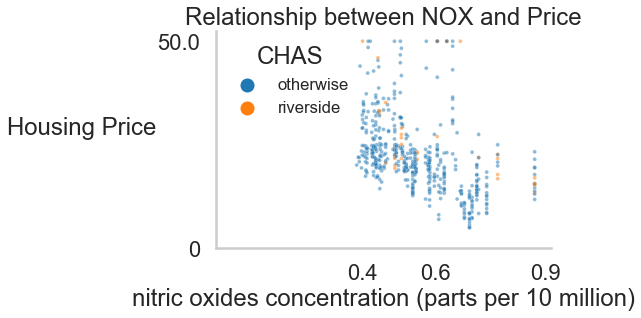

Indeed, NOX is negatively associated with PRICE.


In [908]:
# your turn: create some other scatter plots
# Exercise: What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.

# import seaborn as sns
# sns.pairplot(data=bos, kind="reg")

print(
    "Although it is a binary discrete variable, CHAS is interesting since riverfront properties may be priced differently."
)

rcParams.update(inline_rc)
plt.scatter(bos.CHAS, bos.PRICE, s=10, alpha=0.2)
plt.title("Relationship between CHAS and Price")
ax = plt.gca()

plt.grid(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.axis(ymax=bos.PRICE.max() + 2.5, xmin=-0.5, xmax=1.5)
plt.xlabel("Charles River dummy variable")
plt.ylabel("Housing Price", rotation=0)
plt.xticks([0, 1], ["otherwise", "bounds river"])
t = [0, bos.PRICE.max()]
plt.yticks(t, t)
ax.yaxis.set_label_coords(-0.4, 0.5)

plt.show()
print("Riverside properties may have slightly lower prices on average.")
print()

print(
    "Properties with better access to infrastructure may be priced differently, so RAD is interesting."
)

plt.scatter(bos.RAD, bos.PRICE, s=10, alpha=0.2)
plt.title("Relationship between RAD and Price")
ax = plt.gca()

plt.grid(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.axis(ymax=bos.PRICE.max() + 2.5)
plt.xlabel("index of accessibility to radial highways")
plt.ylabel("Housing Price", rotation=0)
plt.xticks([1, 8, bos.RAD.max()])
t = [0, bos.PRICE.max()]
plt.yticks(t, t)
ax.yaxis.set_label_coords(-0.4, 0.5)

plt.show()
print("Higher index scores are associated with lower prices.")
print(
    "Interestingly, all observations either have RAD values of 24 or are less than or equal to 8 (on an ordinal scale)."
)
print()

print(
    "NOX is interesting because it is a measure of a pollutant, so we'd expect high NOX to associated with low PRICE."
)
ax = plt.gca()
bos["CHAS"] = bos["CHAS"].astype("category")
sns.scatterplot(x=bos.NOX, y=bos.PRICE, s=15, alpha=0.5, hue=bos.CHAS)
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    frameon=False,
    fontsize="x-small",
    title="CHAS",
    handles=handles,
    labels=["otherwise", "riverside"],
)
plt.title("Relationship between NOX and Price")

plt.grid(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.axis(
    ymin=0,
    ymax=bos.PRICE.max() + 2.5,
    xmin=0,
    xmax=bos.NOX.max() + bos.NOX.max() * 0.05,
)
plt.xlabel("nitric oxides concentration (parts per 10 million)")
plt.ylabel("Housing Price", rotation=0)
t = [0, bos.PRICE.max()]
plt.yticks(t, t)
t = [round(_, 1) for _ in [bos.NOX.min(), bos.NOX.mean(), bos.NOX.max()]]
plt.xticks(t, t)
ax.yaxis.set_label_coords(-0.4, 0.5)

plt.show()
print("Indeed, NOX is negatively associated with PRICE.")

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

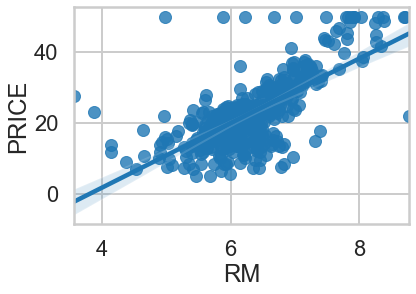

In [909]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


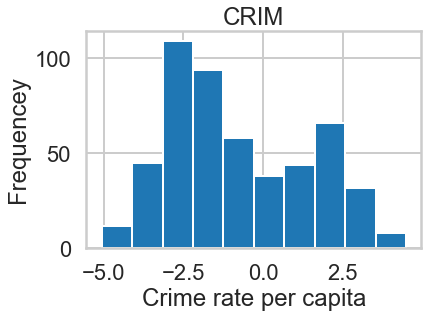

In [910]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality r

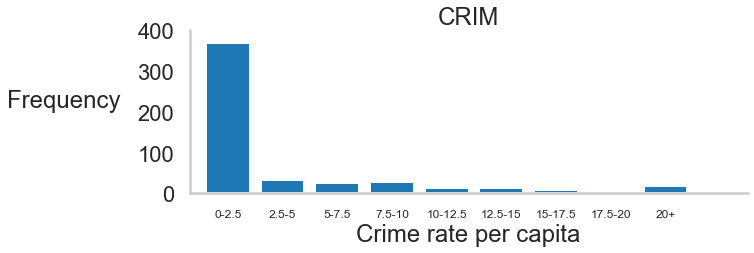

Crime rate per capita is heavily positively skewed.
Log transformations are a common way to reduce skew.
It is also used to re-scale non-normal distributions for parametric models with assumptions of normality.
'A multiplicative model on the original scale corresponds to an additive model on the log scale.'
(https://statmodeling.stat.columbia.edu/2019/08/21/you-should-usually-log-transform-your-positive-data/)
The log-transformed histogram immediately reveals that most of the CRIM data is less than 1.


In [911]:
# your turn
# Exercise: In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

rcParams.update(inline_rc)
plt.figure(figsize=(10, 3))
ax = plt.gca()

new_crim = bos.CRIM.apply(lambda x: 20.1 if x >= 20 else x)
plt.hist(new_crim, bins=[0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5], rwidth=0.8)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency", rotation=0)
ax.yaxis.set_label_coords(-0.225, 0.5)

plt.grid(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.axis(xmin=-0.5, xmax=25)
plt.xticks(
    [1.25, 3.75, 6.25, 8.75, 11.25, 13.75, 16.25, 18.75, 21.25],
    [
        "0-2.5",
        "2.5-5",
        "5-7.5",
        "7.5-10",
        "10-12.5",
        "12.5-15",
        "15-17.5",
        "17.5-20",
        "20+",
    ],
    fontsize=12,
)
plt.yticks([0, 100, 200, 300, 400])

plt.show()
print("Crime rate per capita is heavily positively skewed.")
print("Log transformations are a common way to reduce skew.")
print(
    "It is also used to re-scale non-normal distributions for parametric models with assumptions of normality."
)
print(
    "'A multiplicative model on the original scale corresponds to an additive model on the log scale.'"
)
print(
    "(https://statmodeling.stat.columbia.edu/2019/08/21/you-should-usually-log-transform-your-positive-data/)"
)
print(
    "The log-transformed histogram immediately reveals that most of the CRIM data is less than 1."
)


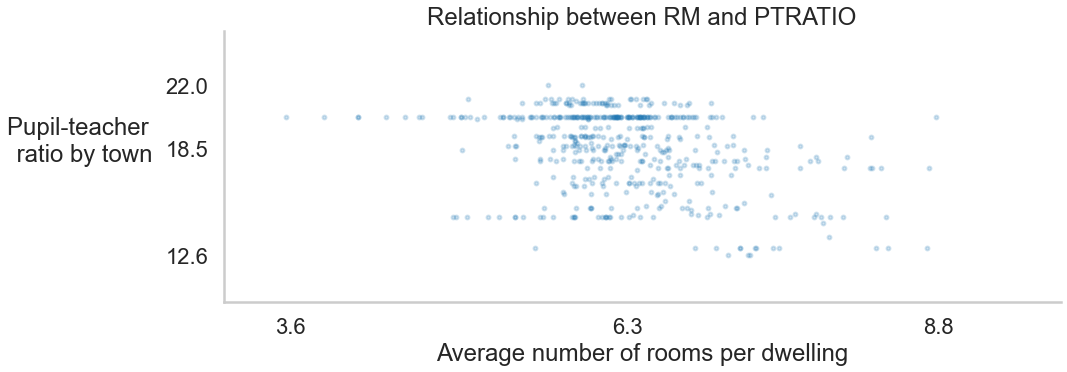

In [912]:
# Exercise: Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.

plt.figure(figsize=(15, 5))
plt.scatter(bos.RM, bos.PTRATIO, s=15, alpha=0.2)
plt.title("Relationship between RM and PTRATIO")

plt.grid(False)
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.axis(ymin=10.0, ymax=25.0, xmin=bos.RM.min() - 0.5, xmax=bos.RM.max() + 1)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Pupil-teacher \n ratio by town", rotation=0)
t = [bos.PTRATIO.min(), round(bos.PTRATIO.mean(), 1), bos.PTRATIO.max()]
plt.yticks(t, t)
ax.yaxis.set_label_coords(-0.17, 0.5)
t = [round(_, 1) for _ in [bos.RM.min(), bos.RM.mean(), bos.RM.max()]]
plt.xticks(t, t)

plt.show()

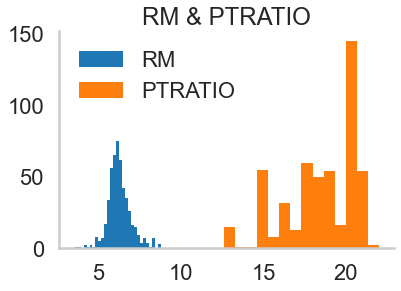

In [913]:
plt.grid(False)
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.hist(bos.RM, bins="auto", label="RM", linewidth=0)
plt.hist(bos.PTRATIO, bins="auto", label="PTRATIO", linewidth=0)
plt.title("RM & PTRATIO")
plt.legend(frameon=False)

plt.show()

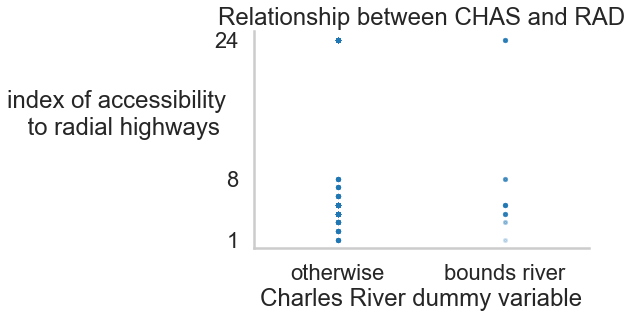

In [914]:
plt.scatter(bos.CHAS, bos.RAD, s=10, alpha=0.2)
plt.title("Relationship between CHAS and RAD")
ax = plt.gca()

plt.grid(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.axis(ymin=0, ymax=25, xmin=-0.5, xmax=1.5)
plt.xlabel("Charles River dummy variable")
plt.ylabel("index of accessibility \n to radial highways", rotation=0)
plt.xticks([0, 1], ["otherwise", "bounds river"])
t = [int(bos.RAD.min()), 8, int(bos.RAD.max())]
plt.yticks(t, t)
ax.yaxis.set_label_coords(-0.4, 0.5)

plt.show()

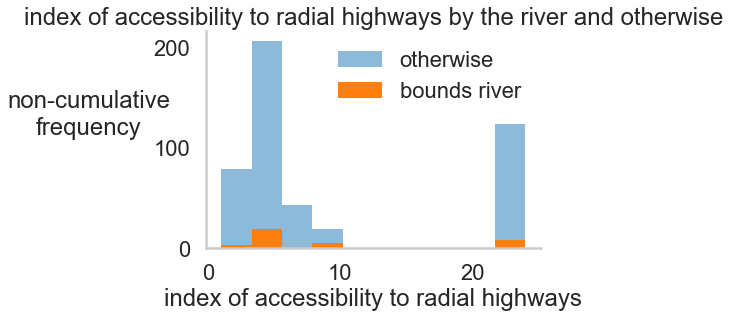

In [915]:
bounds_river = bos.RAD[bos.CHAS == 1]
otherwise = bos.RAD[bos.CHAS == 0]

plt.grid(False)
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.hist(otherwise, bins="auto", alpha=0.5, label="otherwise", linewidth=0)
plt.hist(bounds_river, bins="auto", alpha=1, label="bounds river", linewidth=0)
plt.title("index of accessibility to radial highways by the river and otherwise")
plt.xlabel("index of accessibility to radial highways")
plt.ylabel("non-cumulative\nfrequency", rotation=0)
ax.yaxis.set_label_coords(-0.35, 0.5)
plt.legend(frameon=False)

plt.show()

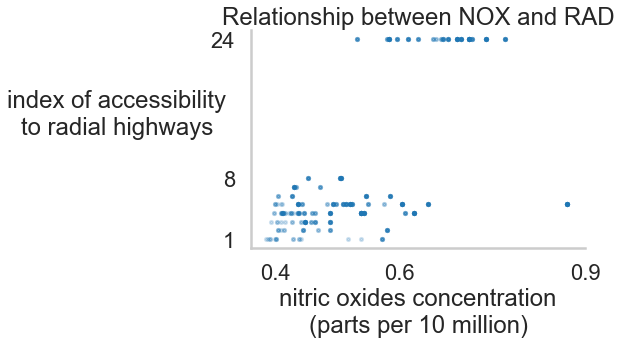

In [916]:
plt.scatter(bos.NOX, bos.RAD, s=10, alpha=0.2)
plt.title("Relationship between NOX and RAD")
ax = plt.gca()

plt.grid(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.axis(ymin=0, ymax=25)
plt.xlabel("nitric oxides concentration\n(parts per 10 million)")
plt.ylabel("index of accessibility\nto radial highways", rotation=0)
t = [round(_, 1) for _ in [bos.NOX.min(), bos.NOX.mean(), bos.NOX.max()]]
plt.xticks(t, t)
t = [int(bos.RAD.min()), 8, int(bos.RAD.max())]
plt.yticks(t, t)
ax.yaxis.set_label_coords(-0.4, 0.5)

plt.show()

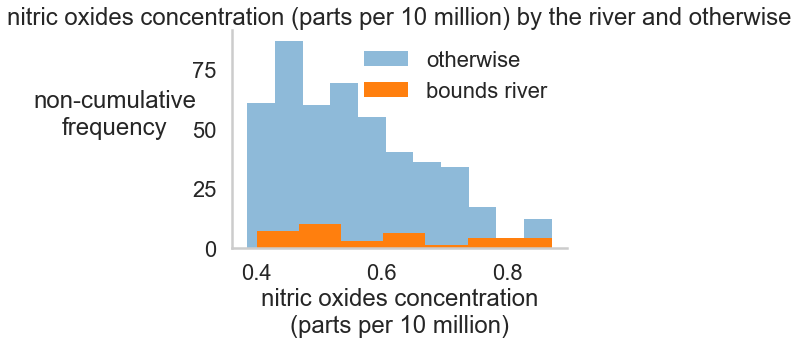

In [917]:
bounds_river = bos.NOX[bos.CHAS == 1]
otherwise = bos.NOX[bos.CHAS == 0]

plt.grid(False)
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.hist(otherwise, bins="auto", alpha=0.5, label="otherwise", linewidth=0)
plt.hist(bounds_river, bins="auto", alpha=1, label="bounds river", linewidth=0)
plt.title(
    "nitric oxides concentration (parts per 10 million) by the river and otherwise"
)
plt.xlabel("nitric oxides concentration\n(parts per 10 million)")
plt.ylabel("non-cumulative\nfrequency", rotation=0)
ax.yaxis.set_label_coords(-0.35, 0.5)
plt.legend(frameon=False)

plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [918]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [919]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           2.49e-74
Time:                        01:12:58   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

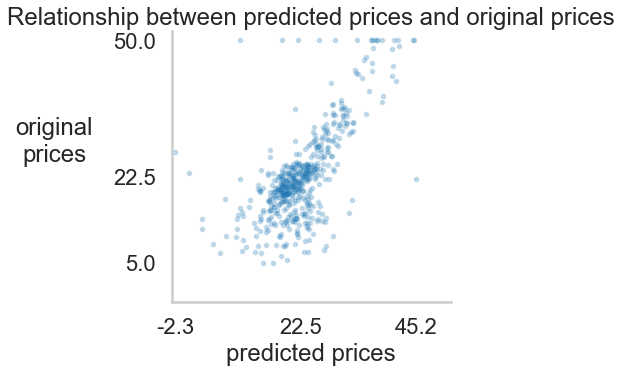

In [920]:
# your turn
# Exercise: Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.

plt.figure(figsize=(5, 5))

plt.scatter(m.fittedvalues, bos.PRICE, s=15, alpha=0.2)
plt.title("Relationship between predicted prices and original prices")

plt.grid(False)
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.axis(xmin=-3, xmax=52, ymin=-3, ymax=52)

plt.xlabel("predicted prices")
t = [
    round(m.fittedvalues.min(), 1),
    round(m.fittedvalues.mean(), 1),
    round(m.fittedvalues.max(), 1),
]
plt.xticks(t, t)

plt.ylabel("original\nprices", rotation=0)
t = [round(bos.PRICE.min(), 1), round(bos.PRICE.mean(), 1), round(bos.PRICE.max(), 1)]
plt.yticks(t, t)
ax.yaxis.set_label_coords(-0.42, 0.5)

# Overall, the model is underpredicting the observed values of original prices.
# For some input values, the model is outputting negative predicted prices, which is unrealistic.
# The horizontal line forming at the top of the figure below indicates a possible ceiling effect.

### Fitting Linear Regression using `sklearn`


In [921]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [922]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [923]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [924]:
# your turn
# Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).

print("There is a parameter called fit_intercept that defaults to True.")
print(
    "To change the model to not fit an intercept term, this may be set to False instead when calling LinearRegression()."
)
print("A model without an intercept term would pass through the origin.")
print(
    "It may be inappropriate to omit the intercept if features cannot be zero valued."
)
print("Since this is suburban housing data, I would not omit the intercept.")
print("It is unlikely for the number of rooms or the price to be below zero.")


There is a parameter called fit_intercept that defaults to True.
To change the model to not fit an intercept term, this may be set to False instead when calling LinearRegression().
A model without an intercept term would pass through the origin.
It may be inappropriate to omit the intercept if features cannot be zero valued.
Since this is suburban housing data, I would not omit the intercept.
It is unlikely for the number of rooms or the price to be below zero.


In [925]:
# Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.

print(
    "It is not enough to claim the residuals are iid by demonstrating a normal distribution."
)
print(
    "Residuals could be normally distributed yet still form a pattern when plotted against predicted or actual values."
)
print(
    "Normally distributed residuals may not reveal multicollinearity in predictor features."
)
print("The Dubin-Watson test may be used as an indicator of auto correlation.")


It is not enough to claim the residuals are iid by demonstrating a normal distribution.
Residuals could be normally distributed yet still form a pattern when plotted against predicted or actual values.
Normally distributed residuals may not reveal multicollinearity in predictor features.
The Dubin-Watson test may be used as an indicator of auto correlation.


In [926]:
# Exercise: True or false. To use linear regression,  𝑌  must be normally distributed. Explain your answer.

print(
    "False. It is not a requirement that Y be normally distributed to use linear regression effectively."
)
print(
    "For instance, Y could follow a uniform distribution that linearly varies with X nonetheless."
)


False. It is not a requirement that Y be normally distributed to use linear regression effectively.
For instance, Y could follow a uniform distribution that linearly varies with X nonetheless.


### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [927]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [928]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [929]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [930]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

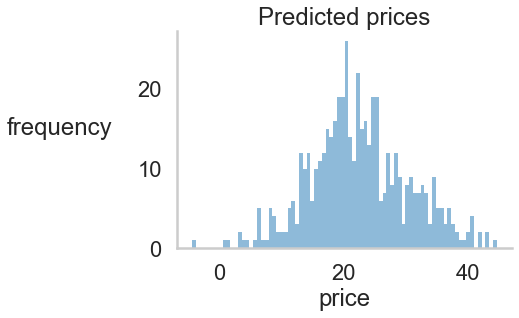

The distribution is bell shaped and centered near 20, perhaps with slight positive skew.
There may be some outliers that are less than 0.
They could indicate an anomaly in the data.
The data points comprising those outliers should be examined.


In [931]:
# your turn
# Exercise: Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?

predicted = lm.predict(X)

plt.grid(False)
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.hist(predicted, bins=80, alpha=0.5, linewidth=0)
plt.title("Predicted prices")
plt.xlabel("price")
plt.ylabel("frequency", rotation=0)
ax.yaxis.set_label_coords(-0.35, 0.5)
plt.show()

print(
    "The distribution is bell shaped and centered near 20, perhaps with slight positive skew."
)
print("There may be some outliers that are less than 0.")
print("They could indicate an anomaly in the data.")
print("The data points comprising those outliers should be examined.")


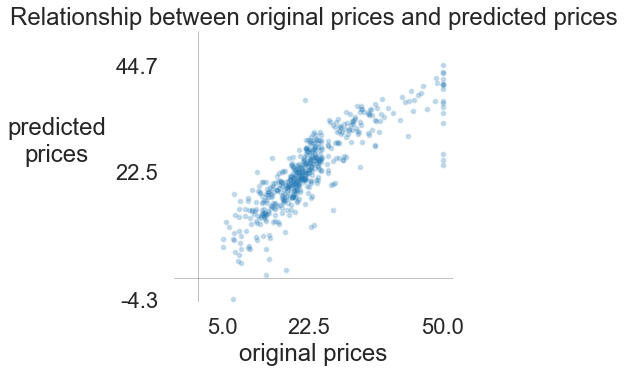

In [932]:
# Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).

plt.figure(figsize=(5, 5))
plt.grid(False)
plt.scatter(bos.PRICE, predicted, s=15, alpha=0.2)
plt.title("Relationship between original prices and predicted prices")
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)
plt.axis(xmin=-5, xmax=52, ymin=-5, ymax=52)

plt.xlabel("original prices")
t = [round(bos.PRICE.min(), 1), round(bos.PRICE.mean(), 1), round(bos.PRICE.max(), 1)]
plt.xticks(t, t)

plt.ylabel("predicted\nprices", rotation=0)
t = [round(predicted.min(), 1), round(predicted.mean(), 1), round(predicted.max(), 1)]
plt.yticks(t, t)
ax.yaxis.set_label_coords(-0.42, 0.5)

plt.show()

In [934]:
# Exercise: We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?

print("statsmodels and scikit-learn are comparable for linear modeling.")
print("In my experience, scikit-learn is more popular.")
print(
    "However, statsmodels' output is more verbose and provides some statistics that sci-kit learn does not provide by default."
)


statsmodels and scikit-learn are comparable for linear modeling.
In my experience, scikit-learn is more popular.
However, statsmodels' output is more verbose and provides some statistics that sci-kit learn does not provide by default.


### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [855]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [856]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [935]:
# your turn
# Exercise: Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.

lm.fit(bos[["PTRATIO"]], bos.PRICE)
r2score = lm.score(bos[["PTRATIO"]], bos.PRICE)
K = 1
N = len(bos)
fstat = (r2score / (1 - r2score)) * ((N - K - 1) / K)
m = ols("PRICE ~ PTRATIO", bos).fit()
print(m.summary())
print()
print("coefficient: ", lm.coef_, "intercept: ", lm.intercept_)
print(
    "Each unit of increase in PTRATIO is associated with a -2.16 decrease in PRICE on average."
)
print(
    "When there are very many teachers relative to pupils (or vice versa), the predicted value of PRICE is around 62.3"
)


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.61e-34
Time:                        01:14:26   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

In [936]:
# Exercise: Calculate (or extract) the  𝑅2  value. What does it tell you?

print(
    "F(1, 504) =",
    str(round(fstat, 2)) + ",",
    "p < .0001, R-squared =",
    str(round(r2score, 2)).lstrip("0"),
)
print("About 25.8% of the variation in PRICE can be explained by the model.")

F(1, 504) = 175.11, p < .0001, R-squared = .26
About 25.8% of the variation in PRICE can be explained by the model.


In [937]:
# Exercise: Compute the  𝐹 -statistic. What does it tell you?

print(
    "F(1, 504) =",
    str(round(fstat, 2)) + ",",
    "p < .0001, R-squared =",
    str(round(r2score, 2)).lstrip("0"),
)
print(
    "Because the p value is very small, we may conclude that the model fits the data better when PTRATIO is included as an independent variable than when it is omitted (intercept only)."
)


F(1, 504) = 175.11, p < .0001, R-squared = .26
Because the p value is very small, we may conclude that the model fits the data better when PTRATIO is included as an independent variable than when it is omitted (intercept only).


In [938]:
# Exercise: Take a close look at the  𝐹 -statistic and the  𝑡 -statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.

print(
    "This is corroborated by the t-statistic calculated for PTRATIO, t(504) = -13.23, p < .0001, which reveals a significant main effect."
)
print(
    "The t statistic for the intercept - t(504) = 20.581, p < .0001 - indicates that on average, when teachers vastly outnumber pupils, PRICE is unlikely to be zero."
)
print(
    "Since this is a 'simple' linear regression model, we would expect the t statistic to be significant if the F statistic is significant and vice versa."
)


This is corroborated by the t-statistic calculated for PTRATIO, t(504) = -13.23, p < .0001, which reveals a significant main effect.
The t statistic for the intercept - t(504) = 20.581, p < .0001 - indicates that on average, when teachers vastly outnumber pupils, PRICE is unlikely to be zero.
Since this is a 'simple' linear regression model, we would expect the t statistic to be significant if the F statistic is significant and vice versa.


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [939]:
# your turn
# Exercise: Compute or extract the  𝐹 -statistic. What does it tell you about the model?

ivs = bos[["CRIM", "RM", "PTRATIO"]]
lm.fit(ivs, bos.PRICE)
r2score = lm.score(ivs, bos.PRICE)
K = 3
N = len(bos)
fstat = (r2score / (1 - r2score)) * ((N - K - 1) / K)
m = ols("PRICE ~ CRIM + RM + PTRATIO", bos).fit()
print(m.summary())
print()
print(
    "F(3, 502) = ",
    str(round(fstat, 2)) + ",",
    "p < .0001, R-squared =",
    str(round(r2score, 2)).lstrip("0"),
)
print(
    "The F statistic and its small p value indicate sufficient evidence to conclude that the regression model fits the data better than the model with no independent variables."
)


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           6.15e-98
Time:                        01:15:18   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

In [940]:
# Exercise: Compute or extract the  𝑅2  statistic. What does it tell you about the model?

print(
    "F(3, 502) = ",
    str(round(fstat, 2)) + ",",
    "p < .0001, R-squared =",
    str(round(r2score, 2)).lstrip("0"),
)
print("About 59.4% of the variation in PRICE can be explained by the model.")

F(3, 502) =  245.16, p < .0001, R-squared = .59
About 59.4% of the variation in PRICE can be explained by the model.


In [941]:
# Exercise: Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.

print(
    "The coefficients for each variable each have t statistics with small p values, indicating that these coefficients are significant individually."
)
print("It may be useful to include interaction terms in downstream analyses.")
print(
    "However, the p value for the intercept coefficient is large, which is insufficient evidence to reject the null hypothesis that the coefficient is zero."
)
print(
    "This could suggest that regression through the origin may be worth investigating for these variables."
)


The coefficients for each variable each have t statistics with small p values, indicating that these coefficients are significant individually.
It may be useful to include interaction terms in downstream analyses.
However, the p value for the intercept coefficient is large, which is insufficient evidence to reject the null hypothesis that the coefficient is zero.
This could suggest that regression through the origin may be worth investigating for these variables.


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [942]:
# your turn
# Exercise: Find another variable (or two) to add to the model we built in Part 3. Compute the  𝐹 -test comparing the two models as well as the AIC. Which model is better?

ivs = bos[["CRIM", "RM", "PTRATIO", "RAD", "NOX"]]
lm.fit(ivs, bos.PRICE)
m = ols("PRICE ~ CRIM + RM + PTRATIO + RAD + NOX", bos).fit()
print(m.summary())
print()
print(
    "This model performs better than the previous two when assessed by R-squared, adjusted R-squared, AIC, and BIC."
)
print(
    "The p value for the model is very small as are those for the t statistics of all variables in the model except for RAD."
)
print(
    "The t-test for RAD resulted in t(500) = 1.67, p = .095, which is significant when alpha is .10 but not when it is .0001 as with the previous two models."
)
print(
    "Similarly, the intercept coefficient is not significant when alpha is .0001 but it significant for higher alpha thresholds with t(500) = 2.08, p = .038."
)


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     161.6
Date:                Thu, 22 Apr 2021   Prob (F-statistic):          5.44e-102
Time:                        01:15:49   Log-Likelihood:                -1596.9
No. Observations:                 506   AIC:                             3206.
Df Residuals:                     500   BIC:                             3231.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9630      4.788      2.081      0.0


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

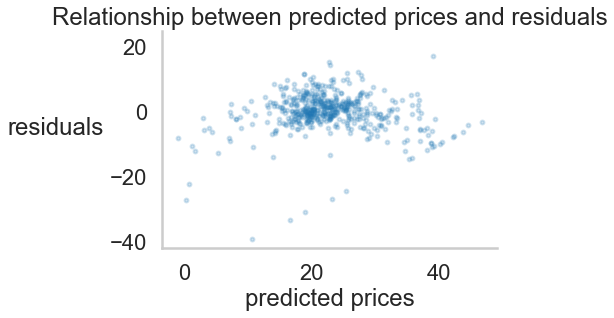

The model appears to be biased towards underestimation overall.
When the model underpredicts, it tends to be worse for lower predicted prices.
The residuals may not be normally distributed.
The linear sub-pattern may indicate that residuals may not be independent of each other.


In [943]:
# Your turn.
# Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

ivs = bos[["CRIM", "RM", "PTRATIO"]]
lm.fit(ivs, bos.PRICE)
predicted = lm.predict(ivs)
r2score = lm.score(ivs, bos.PRICE)
K = 3
N = len(bos)
fstat = (r2score / (1 - r2score)) * ((N - K - 1) / K)
m = ols("PRICE ~ CRIM + RM + PTRATIO", bos).fit()
print()

plt.title("Relationship between predicted prices and residuals")
residuals = predicted - bos.PRICE
plt.scatter(predicted, residuals, s=15, alpha=0.2)

plt.grid(False)
plt.axis(ymax=25)
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlabel("predicted prices")
plt.ylabel("residuals", rotation=0)
ax.yaxis.set_label_coords(-0.32, 0.5)

plt.show()
print("The model appears to be biased towards underestimation overall.")
print("When the model underpredicts, it tends to be worse for lower predicted prices.")
print("The residuals may not be normally distributed.")
print(
    "The linear sub-pattern may indicate that residuals may not be independent of each other."
)


C:\Users\michen\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


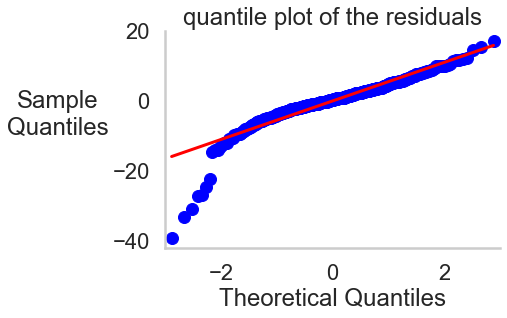

The Q-Q plot may indicate left (negative) skew and heavy tailedness in the distribution of the residuals compared to the normal distribution.
Because the line does not fit well, the residuals may not be normally distributed.


In [945]:
# Exercise: Construct a quantile plot of the residuals. What does the plot tell you?

sm.qqplot(data=residuals, line="r")
plt.title("quantile plot of the residuals")

plt.grid(False)
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("Sample\nQuantiles", rotation=0)
ax.yaxis.set_label_coords(-0.32, 0.5)

plt.show()
print(
    "The Q-Q plot may indicate left (negative) skew and heavy tailedness in the distribution of the residuals compared to the normal distribution."
)
print(
    "Because the line does not fit well, the residuals may not be normally distributed."
)


In [946]:
# Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

print(
    "The quantile plot of the residuals makes it easy to do a quick visual check for normality."
)
print(
    "Plotting residuals vs fitted values makes it easy to visually check for patterns to verify independence."
)


The quantile plot of the residuals makes it easy to do a quick visual check for normality.
Plotting residuals vs fitted values makes it easy to visually check for patterns to verify independence.


C:\Users\michen\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\michen\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


mean CRIM = 22.067895185185186
mean RM = 5.810037037037036
mean PTRATIO = 19.803703703703697
mean PRICE = 19.25555555555556

         CRIM     RM  PTRATIO  PRICE  CRIM-out  RM-out  PTRATIO-out  PRICE-out
100   0.14866  6.727     20.9   27.5         1       1           -1          1
101   0.11432  6.781     20.9   26.5         1       1           -1          1
165   2.92400  6.101     14.7   25.0         1       1            1          1
265   0.76162  5.560     13.0   22.8         1       1           -1          1
360   4.54192  6.398     20.2   25.0         1       1            1          1
365   4.55587  3.561     20.2   27.5         1      -1            1          1
367  13.52220  3.863     20.2   23.1         1      -1            1          1
371   9.23230  6.216     20.2   50.0         1       1            1          1
380  88.97620  6.968     20.2   10.4        -1       1            1          1
398  38.35180  5.453     20.2    5.0        -1       1            1          1
404  4

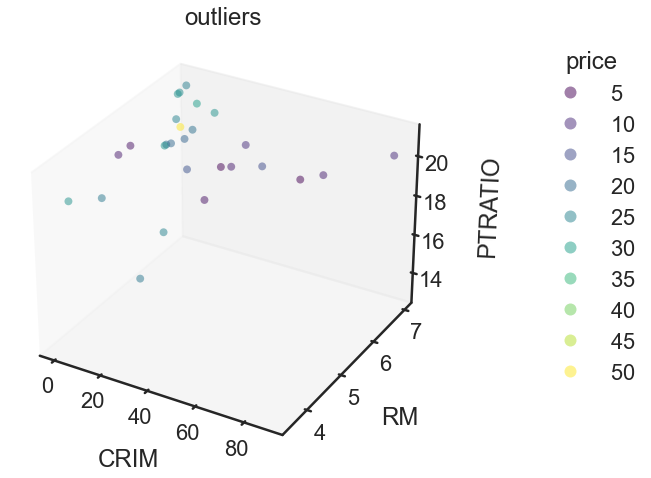

Of the outliers detected in multivariate analysis, 9 of these records were also considered outliers in univariate analysis of CRIM.
By the same count, CRIM outliers are followed by PTRATIO (5 records), RM (3 records), and PRICE (0 records).
This suggests that extreme values of CRIM (untransformed) contribute more to outliers in the multivariate analysis than the other features.
In fact, we noted earlier that CRIM was very skewed.

All but one of the 9 records present in both multivariate analysis and univariate analysis of CRIM were less than the mean of CRIM.
All but one of the 5 records present in both multivariate analysis and univariate analysis of PTRATIO were greater than the mean of PTRATIO.
All 3 records present in both multivariate analysis and univariate analysis of RM were less than the mean of RM.
This suggests that outliers tend towards the lower, upper, and lower regions of the ranges of CRIM, PTRATIO, and RM (respectively).

Record #371 is the only detected outlier with 

In [947]:
# Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

from sklearn.neighbors import LocalOutlierFactor

vars = ["CRIM", "RM", "PTRATIO", "PRICE"]
data = bos[vars]
uni_outliers = {_: LocalOutlierFactor().fit_predict(data[[_]]) for _ in vars}

mask = LocalOutlierFactor().fit_predict(data)
for var in vars:
    data.loc[:, var + "-out"] = uni_outliers[var]
data = data[mask == -1]
for var in vars:
    print("mean " + var, "=", data[var].mean())
print()
print(data)
print()
print(
    "The dataframe above contains 27 outliers detected by multivariate LocalOutlierFactor with default parameters."
)
print(
    "The -out columns indicate with -1 whether that record was detected as an outlier in univariate outlier detection on the single feature (with same method)."
)
print(
    "Note that some records that were detected as outliers in univariate analysis were not retained as outliers in multivariate analysis."
)

x = data.CRIM
y = data.RM
z = data.PTRATIO

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
scatter = ax.scatter(
    x, y, z, s=250, c=data.PRICE, marker=".", cmap="viridis", alpha=0.5, linewidth=0
)

ax.xaxis.labelpad, ax.yaxis.labelpad, ax.zaxis.labelpad = 25, 25, 25
ax.set_xlabel("CRIM")
ax.set_ylabel("RM")
ax.set_zlabel("PTRATIO")

plt.legend(
    *scatter.legend_elements(), bbox_to_anchor=(1.5, 1), frameon=False, title="price"
)
ax.grid(False)
plt.title("outliers")
plt.show()

print(
    "Of the outliers detected in multivariate analysis, 9 of these records were also considered outliers in univariate analysis of CRIM."
)
print(
    "By the same count, CRIM outliers are followed by PTRATIO (5 records), RM (3 records), and PRICE (0 records)."
)
print(
    "This suggests that extreme values of CRIM (untransformed) contribute more to outliers in the multivariate analysis than the other features."
)
print("In fact, we noted earlier that CRIM was very skewed.")
print()
print(
    "All but one of the 9 records present in both multivariate analysis and univariate analysis of CRIM were less than the mean of CRIM."
)
print(
    "All but one of the 5 records present in both multivariate analysis and univariate analysis of PTRATIO were greater than the mean of PTRATIO."
)
print(
    "All 3 records present in both multivariate analysis and univariate analysis of RM were less than the mean of RM."
)
print(
    "This suggests that outliers tend towards the lower, upper, and lower regions of the ranges of CRIM, PTRATIO, and RM (respectively)."
)
print()
print("Record #371 is the only detected outlier with a maximal value for PRICE.")
print(
    "20.2 is the mode value for PTRATIO amongst the outliers, representing 20 of the 27 detected outliers (74.1%)."
)
print()
print("Several records were detected only in multivariate analysis.")
print(
    "For these records, the values for each feature may be typical for their univariate distributions but unusual in conjunction."
)
print()
print("These outliers could have resulted from a problem with the data.")
print(
    "In addition, they could ostensibly represent properties that are priced according to other factors not accounted for in the model."
)
print("In the latter case, some of these properties may be considered 'mispriced'.")
print(
    "For instance, assuming a budget-conscious tenant has included all factors relevant to them in the model, some of these properties could be seen as especially cost in/effective."
)
print(
    "If any of these properties were for sale, unusual prices may be indicative of underpriced or overpriced properties of interest to a real estate firm, for example."
)


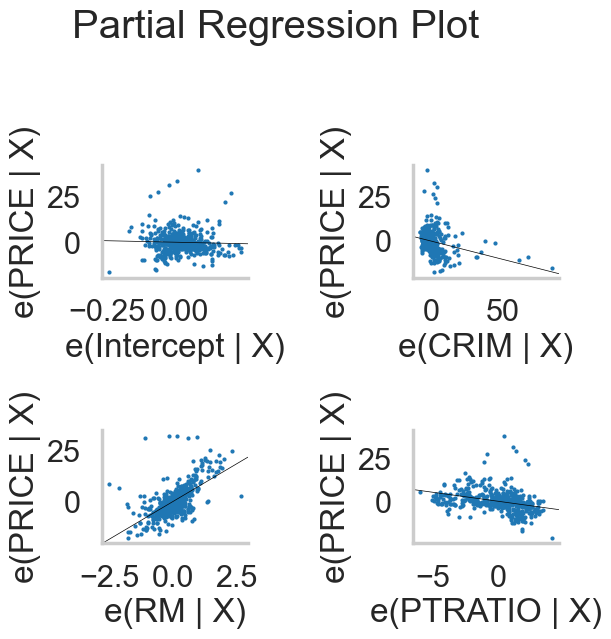

C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality r

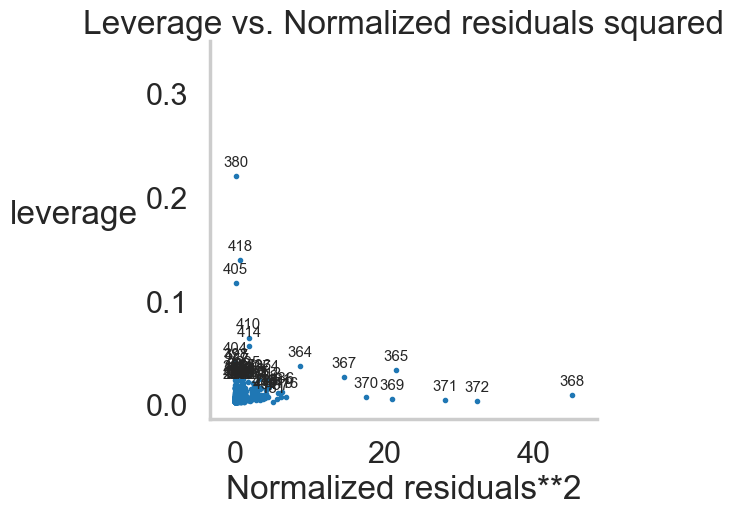

C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\michen\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality r

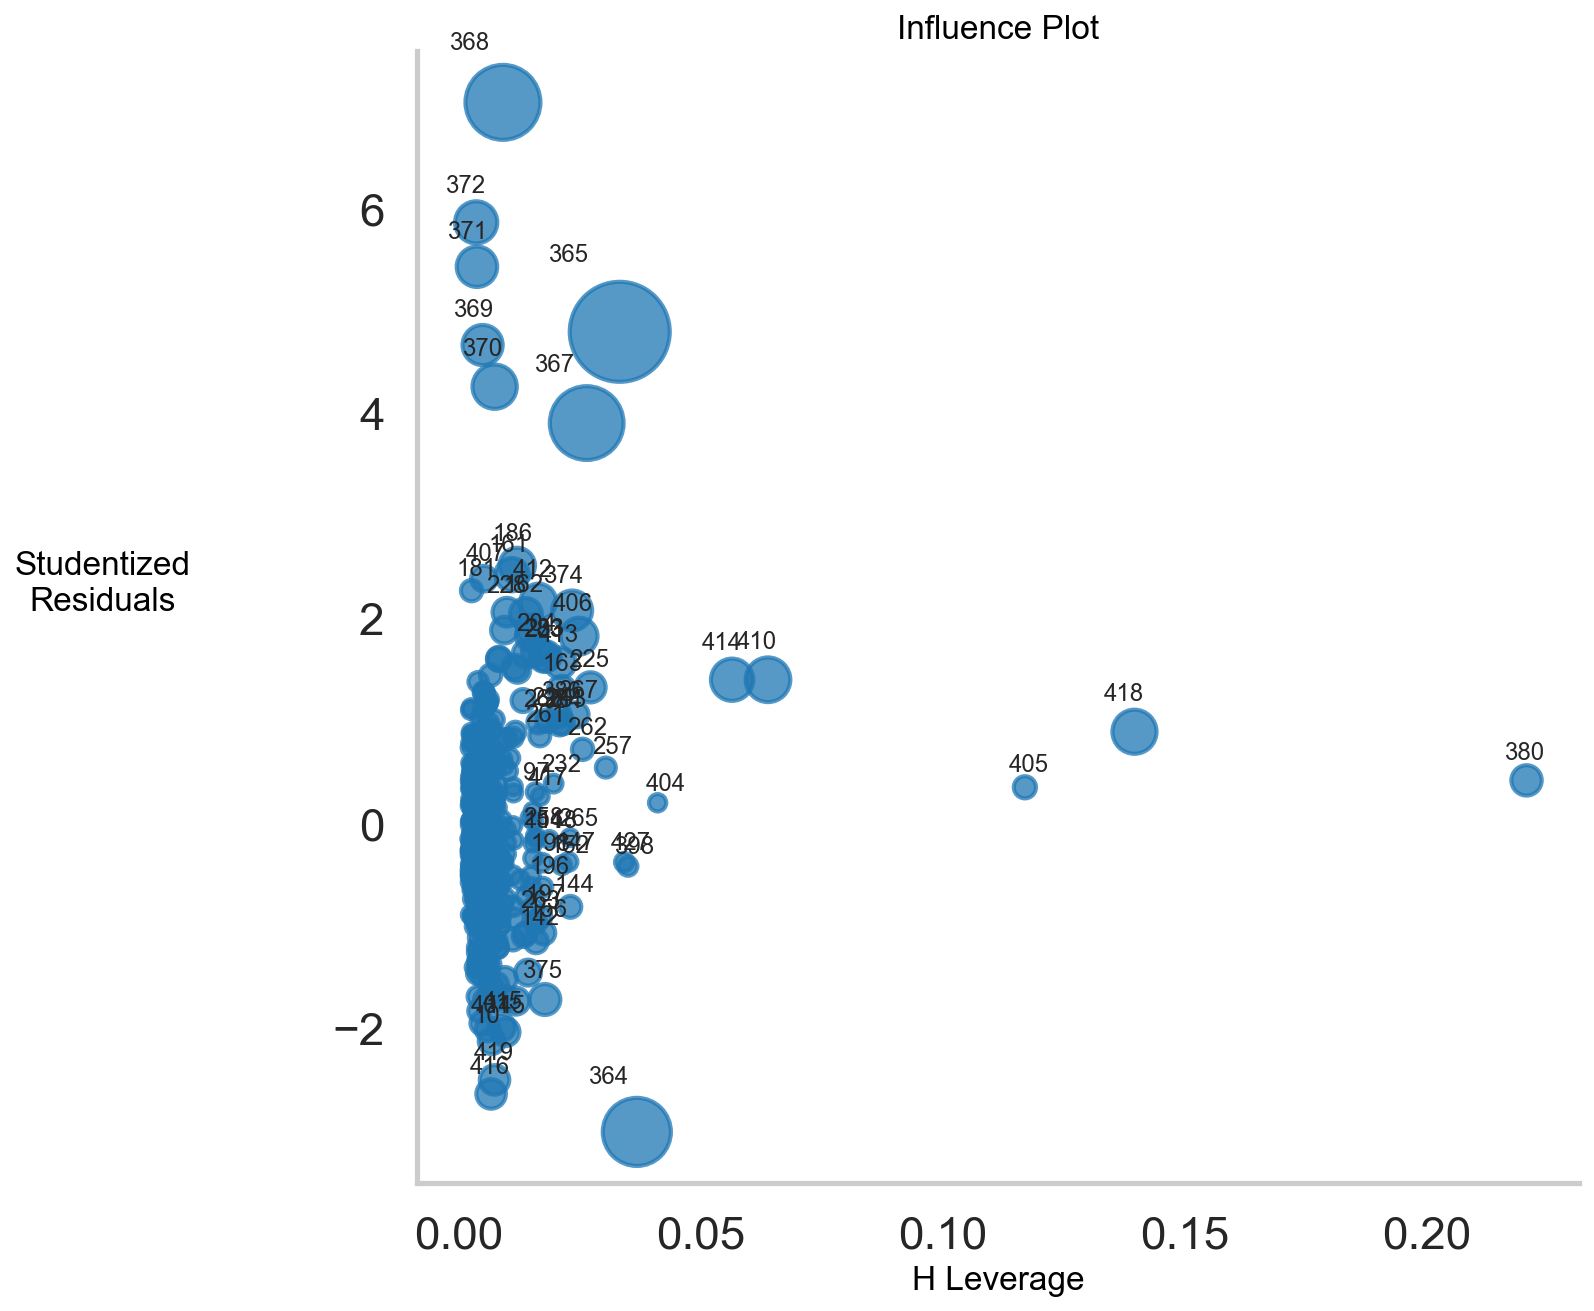

The plots above enable visual identification of three data points with high leverage compared to the rest of the dataset.
The indices of these records are 380, 405, and 418.

Record #380:
CRIM       88.9762
RM          6.9680
PTRATIO    20.2000
PRICE      10.4000
Name: 380, dtype: float64


Record #405:
CRIM       67.9208
RM          5.6830
PTRATIO    20.2000
PRICE       5.0000
Name: 405, dtype: float64


Record #418:
CRIM       73.5341
RM          5.9570
PTRATIO    20.2000
PRICE       8.8000
Name: 418, dtype: float64


All three of these have high values for CRIM.
All three were detected as outliers in the multivariate analysis above.
All three were detected as outliers in the univariate analysis of CRIM above.

CRIM alone is already a useful predictor of PRICE.
As such, observations with extreme values in this feature may have higher leverage.

Other observations with large studentized residuals in prediction may warrant further analysis.
Several of these data points exhibit large in

In [952]:
# Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.
my_data = bos[["CRIM", "RM", "PTRATIO", "PRICE"]]
m = ols("PRICE ~ CRIM + RM + PTRATIO", my_data).fit()

rcParams.update(inline_rc)
fig = plt.figure(figsize=(7, 7), dpi=100)
plt.rc("lines", markersize=2, linewidth=0.5)
plt.rc("axes", grid=False)
plt.rc("axes.spines", right=False, top=False)
sm.graphics.plot_partregress_grid(m, fig=fig)
fig.tight_layout(pad=2)
plt.show()

###

rcParams.update(inline_rc)
plt.rc("figure", figsize=(5, 5), dpi=100)
plt.rcParams["font.size"] = 9
plt.rc("lines", markersize=3)

sm.graphics.plot_leverage_resid2(m)
plt.axis(ymax=0.35)
t = [0.0, 0.1, 0.2, 0.3]
plt.yticks(t, t)
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.grid(False)

plt.ylabel("leverage", rotation=0)
ax.yaxis.set_label_coords(-0.35, 0.5)

plt.show()

###

rcParams.update(inline_rc)
plt.rc("figure", figsize=(10, 10), dpi=150)
plt.rc("font", size=8)
sm.graphics.influence_plot(m)
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.grid(False)
plt.ylabel("Studentized\nResiduals", rotation=0)
ax.yaxis.set_label_coords(-0.27, 0.5)
plt.show()

###

print(
    "The plots above enable visual identification of three data points with high leverage compared to the rest of the dataset."
)
print("The indices of these records are 380, 405, and 418.")
print()
print("Record #380:", my_data.iloc[380], "\n", sep="\n")
print("Record #405:", my_data.iloc[405], "\n", sep="\n")
print("Record #418:", my_data.iloc[418], "\n", sep="\n")
print("All three of these have high values for CRIM.")
print("All three were detected as outliers in the multivariate analysis above.")
print("All three were detected as outliers in the univariate analysis of CRIM above.")
print()
print("CRIM alone is already a useful predictor of PRICE.")
print(
    "As such, observations with extreme values in this feature may have higher leverage."
)
print()
print(
    "Other observations with large studentized residuals in prediction may warrant further analysis."
)
print(
    "Several of these data points exhibit large influence relative to the rest of the dataset."
)
print(
    "Some examples of these records include those with indices numbered 364, 365, 367, 368."
)
print()
print(
    "When taken in conjunction with other points with large studentized prediction residuals but lower influence,"
)
print("the indices of these rows are numbered 364-365, 367-372, 380, 405, 418.")
print(
    "Several of these are consecutive, which is useful to note if the indices reflect the order in which observations were recorded."
)
print("This trend may be reflective of a systematic error.")
print()
print("Record #366 may warrant further investigation as well.")
print(
    "It is the only record with an index in the range of 364-372 that doesn't exhbit a noticeably larger studentized prediction residual in the plots above."
)


In [950]:
# Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

data = bos[["CRIM", "RM", "PTRATIO", "PRICE"]]
print(
    ols(
        "PRICE ~ CRIM + RM + PTRATIO",
        data[LocalOutlierFactor().fit_predict(data) != -1],
    )
    .fit()
    .summary()
)
print()
print(
    "The previous model (including outliers) resulted in F(3, 502) =  245.16, p < .0001, R-squared = .59, and adjusted R-squared = .59 as well as an AIC score of 3232 and BIC score of 3249."
)
print(
    "The new model (outliers omitted) resulted in F(3, 475) =  296.6, p < .0001, R-squared = .65, and adjusted R-squared = .65 as well as an AIC score of 2977 and BIC score of 2994."
)
print("This is a marked improvement on each evaluation measure.")

print(
    "Like the previous model, the new model's variable coefficients are all significant, p < .001."
)
print(
    "Unlike the previous model, the new model is more influenced by CRIM while the other coefficient values only changed a little."
)
print(
    "Also unlike the previous model, the intercept coefficient of the new model approaches significance with t(475) = -1.94, p = .053."
)


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     296.6
Date:                Thu, 22 Apr 2021   Prob (F-statistic):          1.91e-108
Time:                        01:18:02   Log-Likelihood:                -1484.7
No. Observations:                 479   AIC:                             2977.
Df Residuals:                     475   BIC:                             2994.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.5451      3.892     -1.938      0.0